In [1]:
import h5py
import numpy as np
import matplotlib.pylab as plt

In [2]:
#Gain access to the data.
#Note: This does *not* load the entire data set into memory.
dset = h5py.File("../datasets/dataset_train_devel.h5","r")

#Access to the input data
RGB = dset["RGB"]
NIR = dset["NIR"]
#The data has the following size
np.shape(RGB)

(2, 10980, 10980, 3)

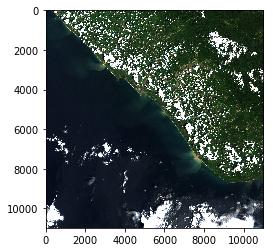

In [3]:
#The dataset contains 3 images with a size of 10980x10980.
#For example, we can also display the first image.
plt.imshow(RGB[0])
plt.show()
# Please note that this will load the entire image into memory.

In [4]:
#Let's create an input-label pair:
#first the input by concatenating the RGB and NIR channels.
input_image = np.concatenate([RGB,np.expand_dims(NIR,axis=-1)],axis=-1)
print(np.shape(input_image))

(2, 10980, 10980, 4)


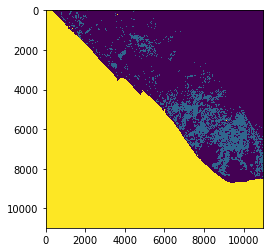

In [5]:
GT = dset["GT"]
#The array GT contains the values 0 = background, 1 = palm oil and 99 = no data.

#Let's visualize this array.
#Note that 99 is assigned to 3 for visualization only.
#-> 99 (3) means that there is no data.
first_gt_image = np.where(GT[0]==99,3,GT[0])
plt.imshow(first_gt_image)
plt.show()

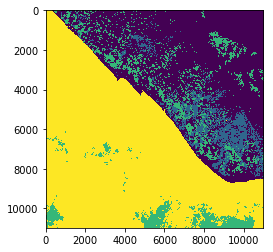

In [6]:
#You can see that palm oil trees are also assigned to the parts that are occluded by clouds.
#Therefore, wherever there is a cloud, we assign the label 2.
CLD = dset["CLD"]
cloud_positions = np.where(CLD[0] > 10)
first_gt_image[cloud_positions] = 2
# lets now print the complete label image
plt.imshow(first_gt_image)
plt.show()

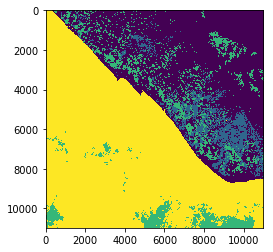

In [7]:
#The label image and the input image still do not match perfectly.
#There are parts in the input image that do not contain data.
#We remove them from the input:
idx = np.where(np.max(input_image[0], axis=-1) == 0)
first_gt_image[idx] = 3
plt.imshow(first_gt_image)
plt.show()

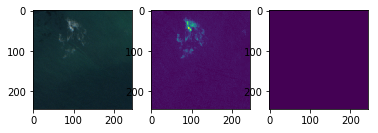

In [8]:
#Finally we can draw a small input window and the corresponding label data
f, axarr = plt.subplots(ncols=3, nrows=1)
axarr[0].imshow(input_image[0,384:628,384:628, :3]) #RGB
axarr[1].imshow(input_image[0,384:628,384:628, -1]) #NIR
axarr[2].imshow(first_gt_image[384:628,384:628])
plt.show()